In [12]:
from LightkurveCacheAccess import perform_search, check_lc_cache, load_fits
import lightkurve as lk
import pandas as pd
from astropy.io import ascii
from scipy.signal import correlate
import numpy as np
from matplotlib.pyplot import *
import pandas as pd
from get_dnu import get_dnu

In [2]:
pdata = pd.read_csv('/home/nielsemb/work/repos/PBjam/pbjam/data/prior_data.csv')
df = pd.read_csv('/home/nielsemb/work/Bluebear_home/repos/PSM128/getdnu/yu_comparison.csv')

In [27]:
iidx = np.isnan(df['dnu_acf'])

In [8]:
idx = (abs((df['dnu_acf']-df['Delnu'])/df['Delnu']) > 0.05) & (df['Delnu'] > 2)

In [10]:
len(df[idx])

427

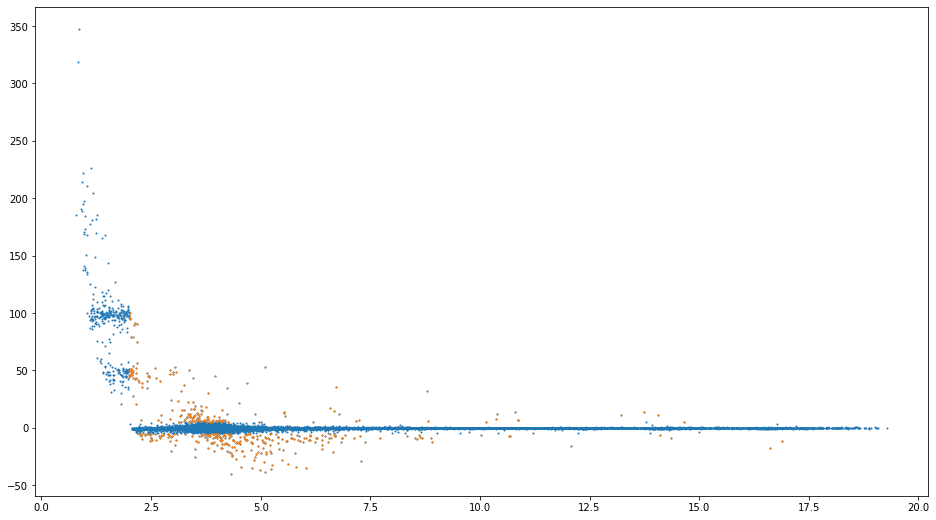

In [9]:
fig, ax = subplots(figsize = (16,9))
ax.scatter(df['Delnu'], (df['dnu_acf']-df['Delnu'])/df['Delnu']*100, s = 1)
ax.scatter(df['Delnu'][idx], (df['dnu_acf'][idx]-df['Delnu'][idx])/df['Delnu'][idx]*100, s = 1)

(2, 10)

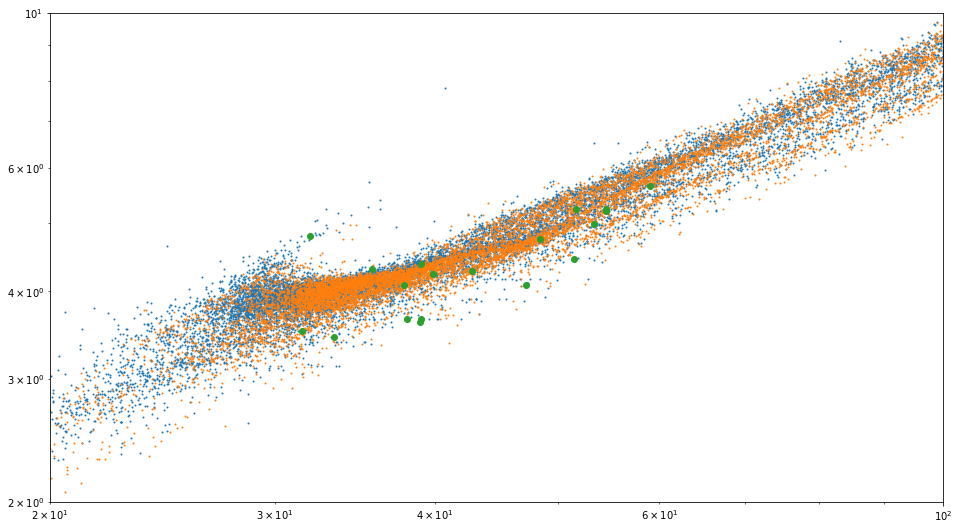

In [35]:
fig, ax = subplots(figsize = (16,9))
ax.scatter(df['numax'], df['dnu_acf'], s = 1)
ax.scatter(10**pdata['numax'], 10**pdata['dnu'], s = 1)
ax.scatter(df.loc[iidx, 'numax'],df.loc[iidx,'Delnu'])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(20,100)
ax.set_ylim(2,10)

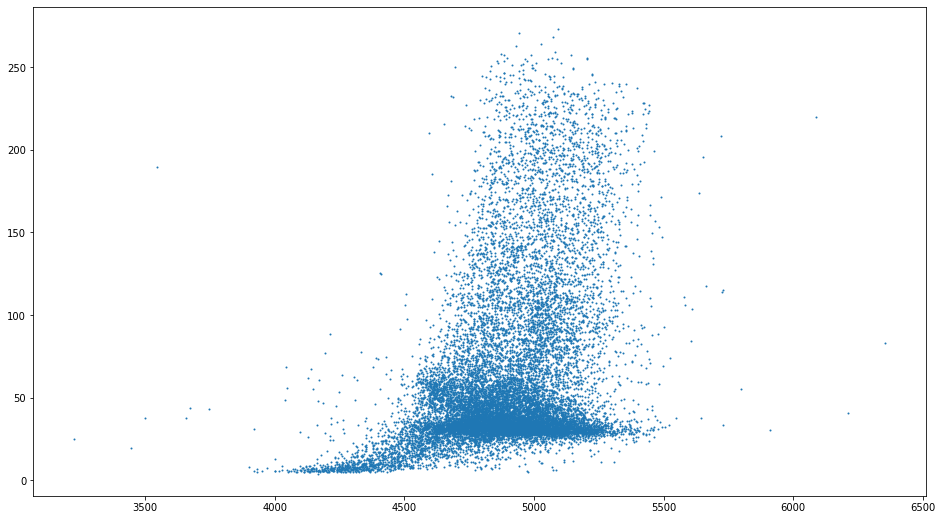

In [41]:
fig, ax = subplots(figsize = (16,9))
ax.scatter(df['Teff'], df['numax'], s = 1)

5.699 5.20826923258997 0.08610822379540795
3.822 3.5574467689782665 0.06921853244943317
3.5410000000000004 3.8419077280030187 0.08497817791669537
6.7029999999999985 6.249948140089153 0.0675894166657983
3.809 4.08507219189735 0.07247891622403509
4.842 3.473438267459521 0.282643893544089
4.101 3.6457837797593733 0.1110012729189531
4.337 3.2979677554314257 0.23957395539971732
2.924 3.1364982769916097 0.07267382934049581
3.176 4.195088732507674 0.3208717671623659


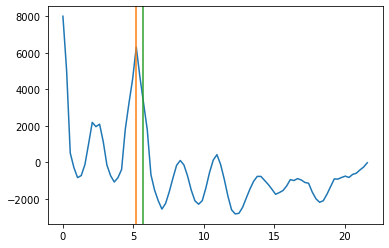

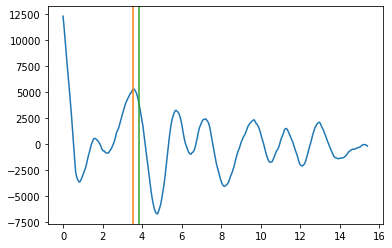

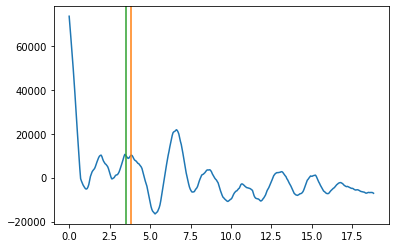

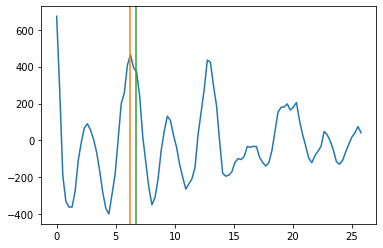

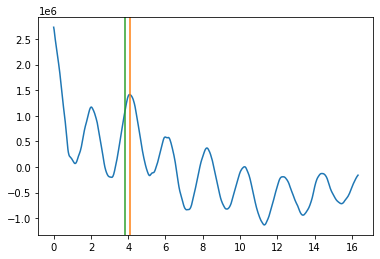

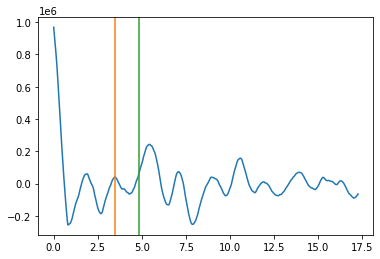

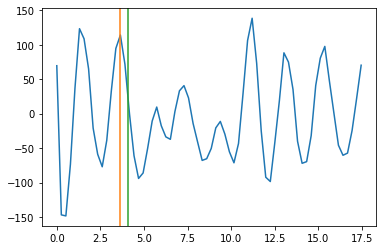

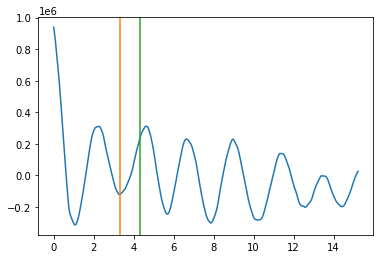

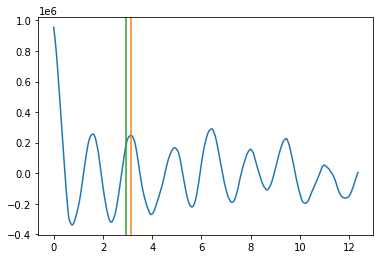

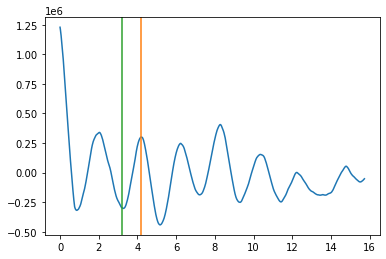

In [19]:
kics = ['KIC'+str(x) for x in df.loc[idx,'KIC']]
numaxs = np.array([(x, y) for x,y in df.loc[idx, ['numax', 'e_numax']].values])
teffs = np.array([(x, y) for x,y in df.loc[idx, ['Teff', 'e_Teff']].values])
delnus = np.array([(x, y) for x,y in df.loc[idx, ['Delnu', 'e_Delnu']].values])
dnuacf = np.array([x for x in df.loc[idx, 'dnu_acf'].values])

N = 1# len(kics)

for i in range(40,50):
    
    #try:
    #print(kics[i], numaxs[i], teffs[i], delnus[i])

    search = perform_search(kics[i])
    files = check_lc_cache(search)
    lc = load_fits(files)
    pg = lc.to_periodogram(normalization='psd').flatten()
    f, s = pg.frequency.value, pg.power.value

    dnus, lags, acf = get_dnu(numaxs[i], teffs[i], f, s, pdata, KDEsize = 500)

    figure()
    plot(lags,acf)
    axvline(dnus, color = 'C1')
    axvline(delnus[i,0], color ='C2')
    print(delnus[i,0], dnus, abs(dnus - delnus[i,0])/delnus[i,0])      
    #except:
    #    continue 

In [ ]:
figure(figsize = (16,9))
l, a = autocorrelate(f,s)
plot(l, a/max(a))
for filter_fac in np.linspace(0.001, 0.3, 10):
    
    prior_dnu = 3.8
    df = np.median(np.diff(f))
    filter_width = filter_fac * prior_dnu
    filt = make_filter(filter_width, df) 
    fudge = 2*int(np.floor(filter_width/df))
    c = np.convolve(s, filt, 'full')[fudge:len(s)]
    lags, acfc = autocorrelate(f[fudge:],c)

    plot(lags,acfc/max(acfc))
xlim(0,20)

In [ ]:
numax = linspace(5,3000, 10000)
e_numax = 0.05*numax
l_numax = numax-e_numax
u_numax = numax+e_numax


